<a href="https://colab.research.google.com/github/stefanjacim/exam_task/blob/main/Rak_dojke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jupiter sveska:

> U tabeli su prikazane deset karakteristika realne vrednosti koje se izaracunava za svako celijsko jezgro.

> U tabeli se nalaze podaci o:

*   ID broj
*   dijagnoza

1.   poluprecnik
2.   tekstura
3.   perimetar
4.   oblast
5.   glatkoca
6.   kompaktnost
7.   konkavnost
8.  konkavne tacke
9. simetrija
10.  fraktalna dimenzija









U prvom koraku dodajemo **pandas** i **nympy** biblioteku, i dodajemo nazive kolonama:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp_stats
df=pd.read_csv('wdbc.data', names=['ID number','diagnosis','radius_1', 'texture_1', 'perimeter_1', 'area_1', 'smoothness_1', 'compactness_1', 'concavity_1', 'concave points_1', 'symmetry_1', 'fractal dimension_1','radius_2', 'texture_2', 'perimeter_2', 'area_2', 'smoothness_2', 'compactness_2', 'concavity_2', 'concave points_2', 'symmetry_2', 'fractal dimension_2','radius_3', 'texture_3', 'perimeter_3', 'area_3', 'smoothness_3', 'compactness_3', 'concavity_3', 'concave points_3', 'symmetry_3', 'fractal dimension_3'])
df.head()

,ID number,diagnosis,radius_1,texture_1,perimeter_1,area_1,smoothness_1,compactness_1,concavity_1,concave points_1,...,radius_3,texture_3,perimeter_3,area_3,smoothness_3,compactness_3,concavity_3,concave points_3,symmetry_3,fractal dimension_3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Tabela sadrzi 32 kolone, od kojih su jedna binarnog tipa ('diagnosis', gde vrednosti mogu biti B/M) ostale su numerickog tipa.

Koliko redova ima u datasetu ?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID number            569 non-null    int64  
 1   diagnosis            569 non-null    object 
 2   radius_1             569 non-null    float64
 3   texture_1            569 non-null    float64
 4   perimeter_1          569 non-null    float64
 5   area_1               569 non-null    float64
 6   smoothness_1         569 non-null    float64
 7   compactness_1        569 non-null    float64
 8   concavity_1          569 non-null    float64
 9   concave points_1     569 non-null    float64
 10  symmetry_1           569 non-null    float64
 11  fractal dimension_1  569 non-null    float64
 12  radius_2             569 non-null    float64
 13  texture_2            569 non-null    float64
 14  perimeter_2          569 non-null    float64
 15  area_2               569 non-null    flo

Postoje 569 redova, bez nedostajucih podataka.

Priprema podataka za analizu:
1.  predstavalja brisanje podataka koji nam nisu potrebni (nisu od znacaja),
2.  promena tipova podataka u odgovarajuce

Brisanje podatka - uklanjanje kolona zbog nerelevantnosti velicine:

In [ ]:
df=df.drop("ID number",1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Promena tipa podataka:

In [ ]:
df['diagnosis']=df['diagnosis'].astype('category')

Za prikaz osnovnih statistickih atributa koristi se funkcija describe():

In [ ]:
df.describe() #df.describe(include='all')

,radius_1,texture_1,perimeter_1,area_1,smoothness_1,compactness_1,concavity_1,concave points_1,symmetry_1,fractal dimension_1,...,radius_3,texture_3,perimeter_3,area_3,smoothness_3,compactness_3,concavity_3,concave points_3,symmetry_3,fractal dimension_3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Nakon funkcije describe, zakljucujemo da su u vecini slucajeva mean po datim kolonama bliski po vrednoscu sa 50%. Sto nam indikuje da je moguca normalna raspodela.

Zakosenost:

In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


radius_1               0.942380
texture_1              0.650450
perimeter_1            0.990650
area_1                 1.645732
smoothness_1           0.456324
compactness_1          1.190123
concavity_1            1.401180
concave points_1       1.171180
symmetry_1             0.725609
fractal dimension_1    1.304489
radius_2               3.088612
texture_2              1.646444
perimeter_2            3.443615
area_2                 5.447186
smoothness_2           2.314450
compactness_2          1.902221
concavity_2            5.110463
concave points_2       1.444678
symmetry_2             2.195133
fractal dimension_2    3.923969
radius_3               1.103115
texture_3              0.498321
perimeter_3            1.128164
area_3                 1.859373
smoothness_3           0.415426
compactness_3          1.473555
concavity_3            1.150237
concave points_3       0.492616
symmetry_3             1.433928
fractal dimension_3    1.662579
dtype: float64

Vrednosti zakosenosti koje su bliske 0 ukazuju na normalnu raspodelu, u suprotnom ukazuju na eksponencijalnu raspodelu.

Ova analiza zakosenosti ukazuje na:

> Vrednosti: smoothness_3, smoothness_1, concave points_3, texture_1, symmetry_1 i radius_1 ukazuju da su bliske **normalnoj raspodeli**.

> Vrednosti: area_2, concavity_2, fractal dimension_2, perimeter_2 i radius_2  ukazuju da su bliske **eksponencijalnoj raspodeli**.

> Ostale vrednosti se nalaze izmedju normalne i eksponencijalne raspodele.







Histogrami:

> koriste se za vizualno odredjivanje raspodele, uz funkciju hist()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f3a01e650>,
      dtype=object)

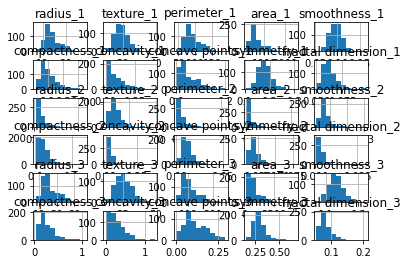

In [ ]:
df.hist()

Histogram za pojedinacnu vrednost:

Primer vrednosti bliske normalnoj raspodeli:

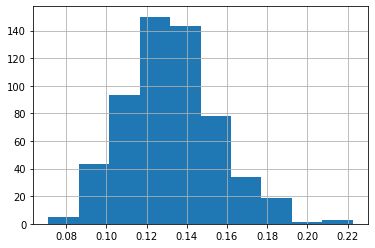

In [ ]:
df['smoothness_3'].hist()

Primer vresdnosti izmedju normalne i eksponencijalne raspodele:

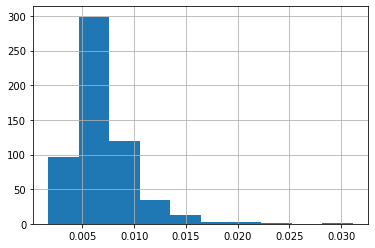

In [ ]:
df['smoothness_2'].hist()

Primer vrednosti bliske eksponencijalnoj raspodeli:

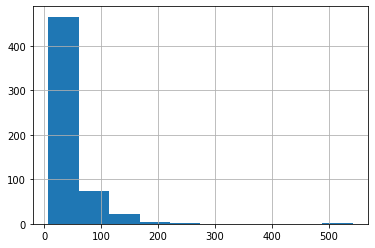

In [ ]:
df['area_2'].hist()

Transformacija iz eksponencijalne u normalnu raspodelu:

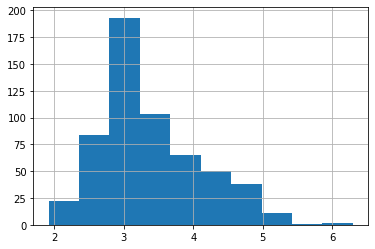

In [ ]:
area_2 = np.log(df['area_2'])
area_2.hist()

Zastupljenost vrednosti svih velicina tipa kategorije u datasetu:

In [ ]:
df.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

Iz ovog zakljucjemo da vise ima benignih slucajeva (B), u odnosu na maligne slucajeve (M).

U datasetu ima 357 benignih slucajeva, i 212 malignih slucajeva.




Zbog neravnomernog raspodela u okviru kategorije 'diagnosis', potrebno je izracunati referentnu tacnost modela:

In [ ]:
benigni=df.groupby('diagnosis').size() ['B']
maligni=df.groupby('diagnosis').size() ['M']
print(benigni/(benigni+maligni))

0.6274165202108963


Referentna tacnost modela je: **0.6274165202108963**
Sto znaci da svaki sledeci model koji ima tacnost vecu od referentne tacnosti, bice pouzdaniji i bolji.

## Korelacije:

1.   pearson
2.   spearman
3.   kendall



Pearsonov koeficijent, koristi se za utvrdjivanje koleracija.
*Koleracija predstavlja odnos vrednosti velicina u skupu podataka.*



In [ ]:
df.corr(method='pearson') #method='pearson' je difoltni metod kod funkcije corr ukoliko ne navedemo drugaciji method

,radius_1,texture_1,perimeter_1,area_1,smoothness_1,compactness_1,concavity_1,concave points_1,symmetry_1,fractal dimension_1,...,radius_3,texture_3,perimeter_3,area_3,smoothness_3,compactness_3,concavity_3,concave points_3,symmetry_3,fractal dimension_3
radius_1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_1,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_1,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_1,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_1,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_1,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_1,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_1,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal dimension_1,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


Uocavamo da postoje jake i slabe korelacije.

> Jake korelacije (korelacije koje su blize 1):

1.   radius_1 - perimeter_1
2.   radius_1 - area_1
3.   radius_1 - concave points_1
4.   perimeter_1 - area_1
5.   perimeter_1 - points_1
...

> Slabe korelacije (korelacije koje su blize 0):

1.   fractal dimension_1 - texture_1
2.   fractal dimension_1 - concave points_1
3.   symmetry_1 - texture_1
4.   symmetry_1 - area_1
5.   concave points_1 - fractal dimension_1
...

















Spearman-ov metod korelacije:

In [ ]:
df.corr(method='spearman')

,radius_1,texture_1,perimeter_1,area_1,smoothness_1,compactness_1,concavity_1,concave points_1,symmetry_1,fractal dimension_1,...,radius_3,texture_3,perimeter_3,area_3,smoothness_3,compactness_3,concavity_3,concave points_3,symmetry_3,fractal dimension_3
radius_1,1.000000,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,0.120242,-0.349931,...,0.978604,0.314911,0.971555,0.978863,0.125789,0.491357,0.596043,0.727265,0.174698,0.044564
texture_1,0.340956,1.000000,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,0.110130,-0.059303,...,0.366547,0.909218,0.375273,0.368335,0.101401,0.290917,0.339725,0.319235,0.120693,0.116144
perimeter_1,0.997802,0.348142,1.000000,0.997068,0.182923,0.543925,0.681958,0.788629,0.150049,-0.304891,...,0.981244,0.323109,0.978980,0.980864,0.156611,0.534565,0.632106,0.757526,0.199007,0.088961
area_1,0.999602,0.344145,0.997068,1.000000,0.138053,0.488988,0.642557,0.755165,0.113928,-0.358425,...,0.979258,0.318178,0.971822,0.980264,0.119712,0.485813,0.593736,0.723390,0.170860,0.038758
smoothness_1,0.148510,0.024649,0.182923,0.138053,1.000000,0.678806,0.518511,0.565172,0.542228,0.588465,...,0.203453,0.060645,0.226345,0.191735,0.796085,0.481384,0.429107,0.498868,0.393579,0.511457
compactness_1,0.497578,0.266499,0.543925,0.488988,0.678806,1.000000,0.896518,0.848295,0.552203,0.499195,...,0.542626,0.255305,0.592254,0.531590,0.578902,0.901029,0.837921,0.825473,0.450333,0.688986
concavity_1,0.645728,0.342646,0.681958,0.642557,0.518511,0.896518,1.000000,0.927352,0.446793,0.258174,...,0.682316,0.335866,0.722424,0.676628,0.488775,0.849985,0.938543,0.904938,0.383667,0.541838
concave points_1,0.759702,0.306891,0.788629,0.755165,0.565172,0.848295,0.927352,1.000000,0.423767,0.142659,...,0.787411,0.300562,0.813960,0.780395,0.490035,0.758309,0.827281,0.937075,0.355477,0.421110
symmetry_1,0.120242,0.110130,0.150049,0.113928,0.542228,0.552203,0.446793,0.423767,1.000000,0.428467,...,0.164552,0.118890,0.190526,0.154462,0.424230,0.440828,0.394481,0.397477,0.710359,0.410069
fractal dimension_1,-0.349931,-0.059303,-0.304891,-0.358425,0.588465,0.499195,0.258174,0.142659,0.428467,1.000000,...,-0.294540,-0.047791,-0.247456,-0.304927,0.493474,0.403653,0.242611,0.139152,0.295046,0.760771


kendall-ov metod korelacije:

In [ ]:
df.corr(method='kendall')

,radius_1,texture_1,perimeter_1,area_1,smoothness_1,compactness_1,concavity_1,concave points_1,symmetry_1,fractal dimension_1,...,radius_3,texture_3,perimeter_3,area_3,smoothness_3,compactness_3,concavity_3,concave points_3,symmetry_3,fractal dimension_3
radius_1,1.000000,0.229159,0.963320,0.985565,0.099549,0.340020,0.465087,0.566917,0.081502,-0.246220,...,0.882063,0.210302,0.862763,0.882035,0.082284,0.332970,0.421100,0.532569,0.114141,0.024103
texture_1,0.229159,1.000000,0.234353,0.230829,0.017135,0.184220,0.236079,0.209629,0.075493,-0.039255,...,0.246993,0.741293,0.254406,0.248096,0.069336,0.199777,0.235242,0.217743,0.081482,0.078289
perimeter_1,0.963320,0.234353,1.000000,0.956965,0.122434,0.375540,0.497587,0.596716,0.101781,-0.214661,...,0.886941,0.216032,0.881245,0.885246,0.102428,0.365026,0.449549,0.559819,0.130283,0.053103
area_1,0.985565,0.230829,0.956965,1.000000,0.092541,0.333534,0.461843,0.561760,0.076963,-0.252131,...,0.883811,0.212051,0.863409,0.885906,0.077793,0.328257,0.418822,0.528375,0.112032,0.020265
smoothness_1,0.099549,0.017135,0.122434,0.092541,1.000000,0.491072,0.364105,0.398511,0.381515,0.417070,...,0.136219,0.041361,0.152343,0.128881,0.608475,0.335814,0.300847,0.349195,0.270602,0.357792
compactness_1,0.340020,0.184220,0.375540,0.333534,0.491072,1.000000,0.719194,0.653022,0.392366,0.345923,...,0.372046,0.174449,0.412628,0.363980,0.412274,0.724842,0.647942,0.633090,0.312991,0.498231
concavity_1,0.465087,0.236079,0.497587,0.461843,0.364105,0.719194,1.000000,0.775266,0.311354,0.173476,...,0.492914,0.227797,0.531750,0.488281,0.338902,0.654070,0.787870,0.734047,0.263490,0.377455
concave points_1,0.566917,0.209629,0.596716,0.561760,0.398511,0.653022,0.775266,1.000000,0.291970,0.094885,...,0.590400,0.200509,0.620728,0.583169,0.339906,0.557303,0.635728,0.783933,0.240447,0.285028
symmetry_1,0.081502,0.075493,0.101781,0.076963,0.381515,0.392366,0.311354,0.291970,1.000000,0.297681,...,0.111969,0.081521,0.129378,0.104677,0.291003,0.308333,0.275028,0.276077,0.520061,0.281841
fractal dimension_1,-0.246220,-0.039255,-0.214661,-0.252131,0.417070,0.345923,0.173476,0.094885,0.297681,1.000000,...,-0.208569,-0.031406,-0.174835,-0.215901,0.348018,0.274333,0.162783,0.092549,0.204803,0.566543


Takodje, postoji mogucnost utvrditi korelacije za dve izabrane velicine:

In [ ]:
df['radius_1'].corr(df['area_1'], method='pearson')

0.9873571700566127

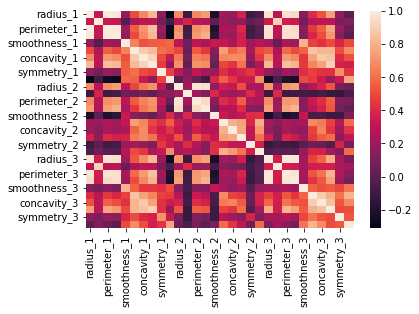

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(method='pearson'));

Korelacija nominalne i kontinualne velicine:

In [ ]:
df.groupby('diagnosis').mean()

,radius_1,texture_1,perimeter_1,area_1,smoothness_1,compactness_1,concavity_1,concave points_1,symmetry_1,fractal dimension_1,...,radius_3,texture_3,perimeter_3,area_3,smoothness_3,compactness_3,concavity_3,concave points_3,symmetry_3,fractal dimension_3
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


Zaključci koji se mogu doneti na osnovu analize:

*   Povecanjem poluprecnika u sva tri slucaja, povecava se verovatnoca da je u pitanju maligni tumor
*   Povecanjem perimetra u sva tri slucaja, povecava se verovatnoca da je u pitanju maligni tumor
*   Smanjenjem oblasti, raste verovatnoca da je tumor benigni
*   Glatkoca ne igra znacjnu ulogu u dijagnozi
*   Sa povecanjem ostrine konkavnih delova sturkture (konkavnost), povecava se verovatnoca da tumor bude maligni
*   Simetrija ne igra znacajnu ulogu u dijagnozi



Sledecom matricom korelacije, mogu se prikazati vrednosti korelacija posebno za benigdne (B), kao i za maligdne (M) vrednosti.

In [ ]:
df.groupby('diagnosis').corr()

radius_1  texture_1  perimeter_1    area_1  \
diagnosis                                                                   
B         radius_1             1.000000  -0.037150     0.996769  0.994435   
          texture_1           -0.037150   1.000000    -0.039923 -0.039055   
          perimeter_1          0.996769  -0.039923     1.000000  0.990653   
          area_1               0.994435  -0.039055     0.990653  1.000000   
          smoothness_1        -0.185118  -0.233814    -0.148729 -0.203128   
          compactness_1        0.060442  -0.058695     0.135411  0.052353   
          concavity_1          0.086757  -0.023084     0.147612  0.092317   
          concave points_1     0.411845  -0.142535     0.465519  0.403397   
          symmetry_1          -0.235576  -0.068707    -0.208957 -0.237391   
          fractal dimension_1 -0.533492  -0.089063    -0.479521 -0.526947   
          radius_2            -0.027761   0.104486    -0.010645 -0.009488   
          texture_2           -0.310815   0.486224    -0.309263 -0.304967   
          perimeter_2          0.000849   0.116176     0.031513  0.015199   
          area_2               0.328988   0.095981     0.342380  0.345826   
          smoothness_2        -0.566280   0.035520    -0.546336 -0.553294   
          compactness_2       -0.121162   0.051963    -0.058476 -0.114711   
          concavity_2         -0.112302   0.019254    -0.065958 -0.103007   
          concave points_2     0.025272  -0.032507     0.077119  0.020774   
          symmetry_2          -0.423085   0.072889    -0.408081 -0.413130   
          fractal dimension_2 -0.255906   0.008620    -0.206614 -0.243264   
          radius_3             0.976980  -0.026223     0.974688  0.973614   
          texture_3           -0.035321   0.918362    -0.040252 -0.039160   
          perimeter_3          0.962649  -0.026053     0.969833  0.958266   
          area_3               0.970200  -0.027282     0.966934  0.977478   
          smoothness_3        -0.296840  -0.176315    -0.269148 -0.307259   
          compactness_3        0.129418  -0.012706     0.193168  0.120378   
          concavity_3          0.116961  -0.010459     0.169798  0.117348   
          concave points_3     0.427068  -0.106141     0.475494  0.413453   
          symmetry_3          -0.146718  -0.085015    -0.129301 -0.152935   
          fractal dimension_3 -0.309311  -0.057026    -0.254780 -0.307107   
M         radius_1             1.000000   0.106516     0.995281  0.990078   
          texture_1            0.106516   1.000000     0.110682  0.103729   
          perimeter_1          0.995281   0.110682     1.000000  0.987223   
          area_1               0.990078   0.103729     0.987223  1.000000   
          smoothness_1        -0.116036  -0.143920    -0.052401 -0.088281   
          compactness_1        0.169168   0.032567     0.256409  0.170181   
          concavity_1          0.482750   0.067135     0.554994  0.493151   
          concave points_1     0.675519   0.017453     0.730158  0.677513   
          symmetry_1          -0.076442  -0.090009    -0.014329 -0.080828   
          fractal dimension_1 -0.388679  -0.061559    -0.313563 -0.368612   
          radius_2             0.639270   0.038681     0.654083  0.685765   
          texture_2            0.046873   0.305950     0.068349  0.051462   
          perimeter_2          0.624785   0.060223     0.651346  0.670732   
          area_2               0.692359   0.048522     0.704736  0.754652   
          smoothness_2         0.028037   0.042511     0.051873  0.041792   
          compactness_2        0.078251   0.127411     0.144042  0.074981   
          concavity_2          0.197571   0.110111     0.257449  0.196556   
          concave points_2     0.234709   0.040930     0.276012  0.225826   
          symmetry_2           0.033727  -0.060615     0.069902  0.033368   
          fractal dimension_2 -0.036762   0.065562     0.025002 -0.035254   
          radius_3         

Mozemo zakljuciti da postoji pozitivna korelacija (velika ili jaka):

*    kod dijagnoze benignog tumora (B) izmedju radius_1 i perimetar_1 koja iznosi *0.996769*.
*   kod dijagnoze malignog tumora (M) izmedju radius_1 i area_1 koja iznosi *0.990078*.





Postoji izvesna koreacija (slaba ili nulta):

*   kod dijagnoze benignog tumora (B) izmedju radius_1 i perimeter_2 koja iznosi *0.000849*
*   kod dijagnoze malignog tumora (M) izmedju fractal dimension_3 i texture_1 koja iznosi *0.025960*

Izrazito negativna korelacija nije uocena.



Chi-squared test:




In [ ]:
from scipy.stats import chi2_contingency
alpha=0.05
Xcorarr=df.columns
Ycor=df['diagnosis']
for x in Xcorarr:
    if(x!='diagnosis'):
        dfObserved=pd.crosstab(Ycor,df[x])
        chi2, p, dof, expected = chi2_contingency(dfObserved.values)
        print(x+':'+str(p))
        if(p<alpha):
            print('     Feature is important')

radius_1:0.029296084732761095
     Feature is important
texture_1:0.2505929829141982
perimeter_1:0.15825729311937892
area_1:0.3070888453840926
smoothness_1:0.6158417342512029
compactness_1:0.4122684162266766
concavity_1:0.24436532508927636
concave points_1:0.25212232984625904
symmetry_1:0.395285614072929
fractal dimension_1:0.48631413368882664
radius_2:0.2809090672900764
texture_2:0.5224154613372465
perimeter_2:0.22653457720879974
area_2:0.2128353140779051
smoothness_2:0.3483575699433711
compactness_2:0.36016986985878424
concavity_2:0.24617650704237956
concave points_2:0.4177543839019003
symmetry_2:0.6083255561888706
fractal dimension_2:0.44850665164307435
radius_3:0.004961626293871761
     Feature is important
texture_3:0.4320580473031923
perimeter_3:0.23132246212653015
area_3:0.31549479667549757
smoothness_3:0.2427292940176238
compactness_3:0.261727153334381
concavity_3:0.2922899709947356
concave points_3:0.04270274947658575
     Feature is important
symmetry_3:0.42755283713581366
fr

Test pokazuje da je statisticki najuticajnija velicina radijus_1, radijus_3 i konkavne tacke_3.

Kramerov test:

In [ ]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

for x in Xcorarr:
    if(x!='diagnosis'):
        dfObserved=pd.crosstab(Ycor,df[x])
        p = cramers_corrected_stat(dfObserved)
        print(x+':'+str(p))

radius_1:0.3193970143933811
texture_1:0.18564132600834996
perimeter_1:0.23511151784624934
area_1:0.1629425952435866


/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/pivot.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agged[v] = maybe_downcast_to_dtype(agged[v], data[v].dtype)


smoothness_1:0.0
compactness_1:0.09996997960523514
concavity_1:0.19393036694662705
concave points_1:0.19058333109442133
symmetry_1:0.10624711981185764
fractal dimension_1:0.0
radius_2:0.17624629101516848
texture_2:0.0
perimeter_2:0.20223249104943505
area_2:0.20842309950078
smoothness_2:0.14132339834826488
compactness_2:0.13417170021381788
concavity_2:0.19269743103302092
concave points_2:0.09449495100376598
symmetry_2:0.0
fractal dimension_2:0.06834645005194437
radius_3:0.3772278931812524
texture_3:0.08303932435685121
perimeter_3:0.1981447177998358
area_3:0.1589443557088697
smoothness_3:0.18238082538473313
compactness_3:0.1847840874006987
concavity_3:0.17047211800644824
concave points_3:0.30924943066976496
symmetry_3:0.08641457965331262
fractal dimension_3:0.0


In [ ]:
x=df.loc[:, 'radius_1':'fractal dimension_3' ]
x

,radius_1,texture_1,perimeter_1,area_1,smoothness_1,compactness_1,concavity_1,concave points_1,symmetry_1,fractal dimension_1,...,radius_3,texture_3,perimeter_3,area_3,smoothness_3,compactness_3,concavity_3,concave points_3,symmetry_3,fractal dimension_3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y=(df.loc[:, ['diagnosis'] ] == 'M').astype(int)
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


# **Metoda k najblizih suseda**

Uvozimo potrebne biblioteke:

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

Zatim vrsimo testiranje sa podacima koji nisu prosi kroz obuku:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=0, stratify=y
)
display(x_train, x_test, y_train, y_test)

,radius_1,texture_1,perimeter_1,area_1,smoothness_1,compactness_1,concavity_1,concave points_1,symmetry_1,fractal dimension_1,...,radius_3,texture_3,perimeter_3,area_3,smoothness_3,compactness_3,concavity_3,concave points_3,symmetry_3,fractal dimension_3
123,14.500,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,0.06402,...,15.700,15.98,102.80,745.5,0.13130,0.17880,0.2560,0.12210,0.2889,0.08006
287,12.890,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.620,15.54,87.40,577.0,0.09616,0.11470,0.1186,0.05366,0.2309,0.06915
129,19.790,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.11490,0.2202,0.06113,...,22.630,33.58,148.70,1589.0,0.12750,0.38610,0.5673,0.17320,0.3305,0.08465
385,14.600,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,0.05416,...,15.790,31.71,102.20,758.2,0.13120,0.15810,0.2675,0.13590,0.2477,0.06836
566,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,11.900,14.65,78.11,432.8,0.11520,0.12960,0.03710,0.03003,0.1995,0.07839,...,13.150,16.51,86.26,509.6,0.14240,0.25170,0.0942,0.06042,0.2727,0.10360
83,19.100,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,0.07224,...,20.330,32.72,141.30,1298.0,0.13920,0.28170,0.2432,0.18410,0.2311,0.09203
301,12.460,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,0.06249,...,13.460,23.07,88.13,551.3,0.10500,0.21580,0.1904,0.07625,0.2685,0.07764
314,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,0.07359,...,8.952,22.44,56.65,240.1,0.13470,0.07767,0.0000,0.00000,0.3142,0.08116


,radius_1,texture_1,perimeter_1,area_1,smoothness_1,compactness_1,concavity_1,concave points_1,symmetry_1,fractal dimension_1,...,radius_3,texture_3,perimeter_3,area_3,smoothness_3,compactness_3,concavity_3,concave points_3,symmetry_3,fractal dimension_3
468,17.60,23.33,119.00,980.5,0.09289,0.20040,0.21360,0.10020,0.1696,0.07369,...,21.57,28.87,143.60,1437.0,0.1207,0.4785,0.5165,0.19960,0.2301,0.12240
221,13.56,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.04451,0.1962,0.06303,...,14.98,17.13,101.10,686.6,0.1376,0.2698,0.2577,0.09090,0.3065,0.08177
93,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,0.05710,...,15.10,25.94,97.59,699.4,0.1339,0.1751,0.1381,0.07911,0.2678,0.06603
240,13.64,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.03731,0.1717,0.05660,...,14.85,19.05,94.11,683.4,0.1278,0.1291,0.1533,0.09222,0.2530,0.06510
128,15.10,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,0.2001,0.06467,...,16.11,18.33,105.90,762.6,0.1386,0.2883,0.1960,0.14230,0.2590,0.07779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,16.17,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,0.1990,0.06572,...,16.97,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960
482,13.47,14.06,87.32,546.3,0.10710,0.11550,0.05786,0.05266,0.1779,0.06639,...,14.83,18.32,94.94,660.2,0.1393,0.2499,0.1848,0.13350,0.3227,0.09326
242,11.30,18.19,73.93,389.4,0.09592,0.13250,0.15480,0.02854,0.2054,0.07669,...,12.58,27.96,87.16,472.9,0.1347,0.4848,0.7436,0.12180,0.3308,0.12970
13,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287


,diagnosis
123,0
287,0
129,1
385,1
566,1
...,...
145,0
83,1
301,0
314,0


,diagnosis
468,1
221,0
93,0
240,0
128,0
...,...
375,0
482,0
242,0
13,1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Skaliranje podataka:

In [ ]:
x_scaler = StandardScaler()
x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.transform(x_test)

Kreiranje i treniranje modela:

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

Pomocu metode predict nam sluzi da predvidimo vrednosti za nezavisno promenljive velicine koje se nalaze u test setu.

In [ ]:
y_pred = model.predict(x_test)

Metodom **score** mozemo da odredimo koeficijent determinacije:

In [ ]:
model.score(x_train, y_train)

0.9765258215962441

Koeficijent determinacije za trening set je 0.9765258215962441

In [ ]:
model.score(x_test, y_test)

0.9370629370629371

Koeficijent determinacije za test set je 0.9370629370629371

Matrica konfuzije:

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_pred)

array([[84,  6],
       [ 3, 50]])

Kao rezultat matrice konfuzije se dobija da su:

*   84 pravilno klasifikovanih elemenata i 6 nepravilno klasifikovanih elemenata
*   50 pravilno klasifikovanih elemenata i 3 nepravilno klasifikovanih elemenata

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

Optimizacija hiper-parametara modela:

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters={'C':[0.001,0.01,0.05,0.1,0.2,1,10.],
           'penalty': ['l2','none'],
           'solver': ['lbfgs'],
           'max_iter':[100,1000,10000]}
model=LogisticRegression()
grid = GridSearchCV(model, parameters, scoring='accuracy', cv=3)
grid = grid.fit(x, y)
print("Best parameters :", grid.best_params_)
print("Best accuracy :", grid.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Best parameters : {'C': 0.001, 'max_iter': 10000, 'penalty': 'none', 'solver': 'lbfgs'}
Best accuracy : 0.9560568086883876


Dobijena tacnost je **0.956**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Predikcije:

In [ ]:
from sklearn import metrics
model=LogisticRegression(C=0.001, max_iter=1000, penalty='none', solver='lbfgs')
model.fit(x_train, y_train)
predictions = model.predict(x_test)
print(metrics.accuracy_score(y_test, predictions))

0.965034965034965


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matrica konfuzije:

In [ ]:
print(confusion_matrix(y_test, predictions, labels=[1,0]))

[[48  5]
 [ 0 90]]


Kao rezultat matrice konfuzije se dobija da su:


*   48 pravilno klasifikovanih elemenata i 5 nepravilno klasifikovanih elemenata
*   90 pravilno klasifikovanih elemenata i 0 nepravilno klasifikovanih elemenata

Klasifikacioni izvestaj na kojem se moze videti preciznost i osetljivost modela:

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143

